# Analyse multivarié

## Install seaborn in current working environment

+ conda install -p D:\supinfo\M1\EDAP\env seaborn

## Libraries import 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## World CO2 dataset

In [4]:
data = pd.read_excel ("EDGAR-2020.xlsx")

In [5]:
data.head()

,Sector,Country,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Power Industry,Afghanistan,0.055674,0.055674,0.114251,0.171021,0.202197,0.205992,0.235568,0.367220,...,2.330491,1.831119,1.596841,1.665016,2.593498,2.504713,3.633843,3.738226,6.039542,6.003787
1,Power Industry,Albania,0.698291,0.698291,0.743364,0.756529,0.763669,0.710070,0.722054,0.718092,...,0.030960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Power Industry,Algeria,1.646111,1.646111,1.550591,1.222271,1.465522,2.112361,2.531350,2.819716,...,28.128661,30.937979,30.102818,32.638835,36.784200,36.171742,37.738717,40.298656,41.902119,39.909258
3,Power Industry,Angola,0.137546,0.137546,0.159283,0.168752,0.371864,0.352957,0.346584,0.346584,...,2.229655,2.699127,3.993621,5.669692,6.130988,6.312641,5.347401,5.312575,5.085368,4.436610
4,Power Industry,Anguilla,0.000430,0.000430,0.000436,0.000438,0.000447,0.000480,0.000521,0.000449,...,0.000910,0.000910,0.000978,0.000976,0.000980,0.001018,0.001056,0.001025,0.001033,0.000906


In [6]:
data.dtypes

Sector      object
Country     object
1970       float64
1971       float64
1972       float64
1973       float64
1974       float64
1975       float64
1976       float64
1977       float64
1978       float64
1979       float64
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       f

In [7]:
data.index


RangeIndex(start=0, stop=1036, step=1)

In [8]:
tidy_data = data.melt(var_name="Year", id_vars=["Sector","Country"], value_name="CO2",
                     )

In [9]:
tidy_data.head()


,Sector,Country,Year,CO2
0,Power Industry,Afghanistan,1970,0.055674
1,Power Industry,Albania,1970,0.698291
2,Power Industry,Algeria,1970,1.646111
3,Power Industry,Angola,1970,0.137546
4,Power Industry,Anguilla,1970,0.000430


In [29]:
tidy_data.isnull().sum()


Sector       0
Country      0
Year         0
CO2        429
dtype: int64

In [32]:
tidy_data.fillna(tidy_data["CO2"].mean(), inplace=True)


In [33]:
tidy_data.isnull().sum()


Sector     0
Country    0
Year       0
CO2        0
dtype: int64

## Total ouput by country using simple group_by

In [38]:
ouput_by_country_s = tidy_data.groupby(["Country","Year"]).sum()
ouput_by_country_s.head()

Sector       CO2
Country     Year                                                             
Afghanistan 1970  Power IndustryBuildingsTransportOther industri...  1.718206
            1971  Power IndustryBuildingsTransportOther industri...  1.716487
            1972  Power IndustryBuildingsTransportOther industri...  1.712408
            1973  Power IndustryBuildingsTransportOther industri...  1.710739
            1974  Power IndustryBuildingsTransportOther industri...  2.170061

## Output by country using reset_index
  

In [39]:
ouput_by_country_r = tidy_data.groupby(["Country","Year"]).sum().reset_index()
ouput_by_country_r.head()

,Country,Year,Sector,CO2
0,Afghanistan,1970,Power IndustryBuildingsTransportOther industri...,1.718206
1,Afghanistan,1971,Power IndustryBuildingsTransportOther industri...,1.716487
2,Afghanistan,1972,Power IndustryBuildingsTransportOther industri...,1.712408
3,Afghanistan,1973,Power IndustryBuildingsTransportOther industri...,1.710739
4,Afghanistan,1974,Power IndustryBuildingsTransportOther industri...,2.170061


## Output getting relevant information

In [41]:
ouput_by_country = tidy_data.groupby(["Country","Year"])["CO2"].sum().reset_index()
ouput_by_country.head()

,Country,Year,CO2
0,Afghanistan,1970,1.718206
1,Afghanistan,1971,1.716487
2,Afghanistan,1972,1.712408
3,Afghanistan,1973,1.710739
4,Afghanistan,1974,2.170061


+ Output 

In [40]:
ouput_by_sector = tidy_data.groupby(["Sector","Year"]).sum().reset_index()
ouput_by_sector.head()

,Sector,Year,Country,CO2
0,Buildings,1970,AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...,3026.825810
1,Buildings,1971,AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...,3039.938325
2,Buildings,1972,AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...,3160.158054
3,Buildings,1973,AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...,3196.876475
4,Buildings,1974,AfghanistanAlbaniaAlgeriaAngolaAnguillaAntigua...,3114.381572


In [48]:
ouput_by_sector = tidy_data.groupby(["Sector","Year"])["CO2"].sum().reset_index()
ouput_by_sector.head()

,Sector,Year,CO2
0,Buildings,1970,3026.825810
1,Buildings,1971,3039.938325
2,Buildings,1972,3160.158054
3,Buildings,1973,3196.876475
4,Buildings,1974,3114.381572


In [49]:
ouput_by_year = tidy_data.groupby(["Year"])["CO2"].sum().reset_index()
ouput_by_year.head()

,Year,CO2
0,1970,16280.414455
1,1971,16233.927604
2,1972,17037.074637
3,1973,17939.949352
4,1974,17909.096057


In [50]:
ouput_by_sector_all_country = tidy_data.groupby(["Sector"])["CO2"].sum().reset_index()
ouput_by_sector_all_country.head()

,Sector,CO2
0,Buildings,167845.724625
1,Other industrial combustion,298553.178886
2,Other sectors,139991.654449
3,Power Industry,447465.584616
4,Transport,270615.332953


In [51]:
ouput_for_all_country_by_all_sector = tidy_data.groupby(["Country"])["CO2"].sum().reset_index()
ouput_for_all_country_by_all_sector.head()

,Country,CO2
0,Afghanistan,183.345100
1,Albania,512.141706
2,Algeria,4454.510218
3,Angola,863.218442
4,Anguilla,0.635722


+ Nuage de point

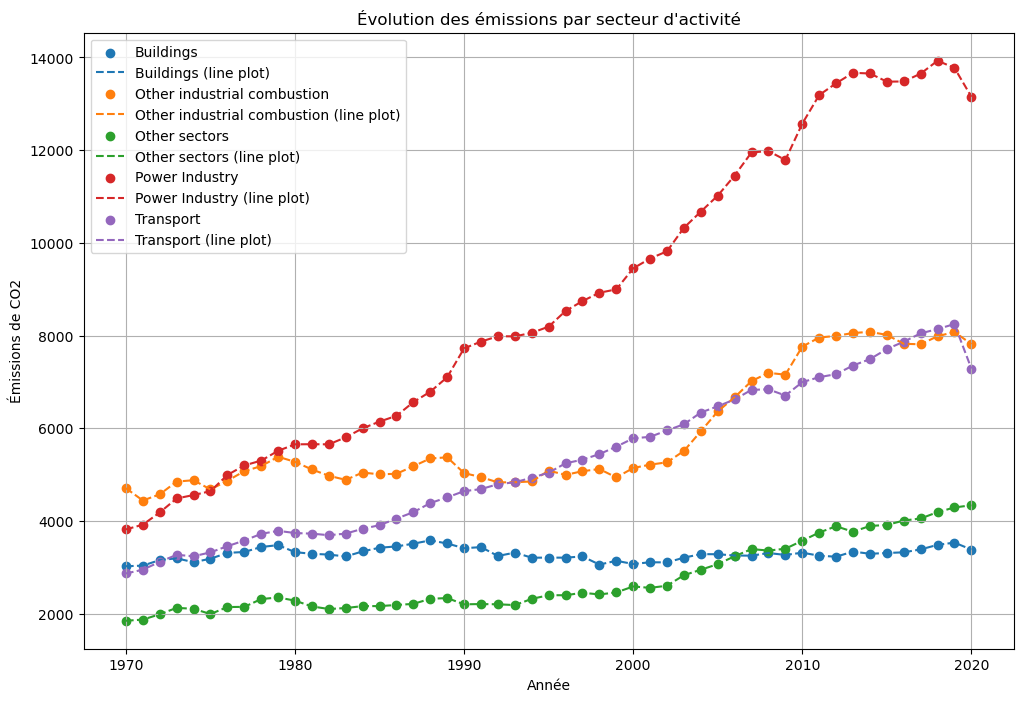

In [58]:
df = tidy_data.groupby(["Sector","Year"])["CO2"].sum().reset_index()
secteurs = df['Sector'].unique()

# Création d'une figure pour les tracés
plt.figure(figsize=(12, 8))

# Boucle sur chaque secteur
for secteur in secteurs:
    # Filtrage des données pour le secteur actuel
    data_secteur = df[df['Sector'] == secteur]
    
    # Représentation par nuage de points
    plt.scatter(data_secteur['Year'], data_secteur['CO2'], label=secteur)
    
    # Représentation par line plot
    plt.plot(data_secteur['Year'], data_secteur['CO2'], label=secteur + ' (line plot)', linestyle='--')

# Paramètres de la figure
plt.title('Évolution des émissions par secteur d\'activité')
plt.xlabel('Année')
plt.ylabel('Émissions de CO2')
plt.legend()
plt.grid(True)
plt.show()